# 🧬 Conjunto de dados sobre câncer de mama em Wisconsin

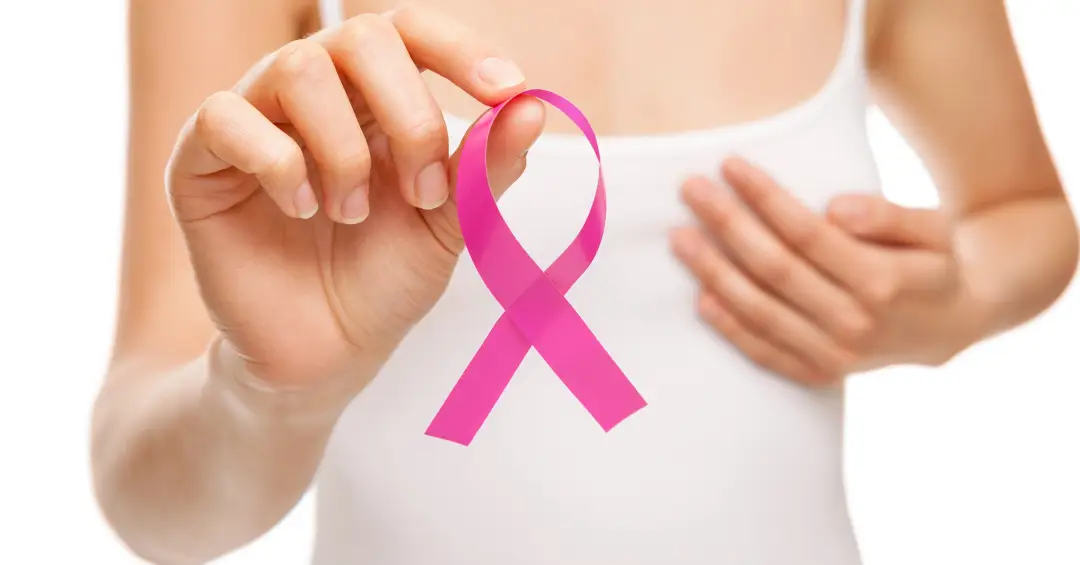

### 🧾 Descrição do problema

Tamanho do dataset: 569 amostras

Número de features: 30 atributos numéricos

Target (rótulo):

0 = maligno

1 = benigno

**Objetivo: Prever se um tumor é benigno ou maligno com base em características extraídas de imagens de células.**

### 📊 Principais features:
Exemplos de atributos extraídos de exames (para cada célula):

mean radius – Raio médio

mean texture – Textura média

mean perimeter – Perímetro médio

mean area – Área média

mean smoothness – Suavidade média

Cada um deles tem também variações como “standard error” e “worst” (maior valor observado).

### ✅ Tarefa: Classificação Binária
Esse dataset é perfeito para testar modelos como:

Logistic Regression

Random Forest

Support Vector Machine (SVM)

K-Nearest Neighbors

Gradient Boosting

## Importação das bibliotecas

In [1]:
"""
Importação do conjunto de dados
"""
from sklearn.datasets import load_breast_cancer
"""
Vetores e matrizes
"""
import numpy as np
"""
Análise de dados
"""
import pandas as pd
"""
Gráficos
"""
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sbn
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
"""
Modelos de Machine Learning
"""
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
"""
Métricas
"""
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Importação dos dados

In [2]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Pré-processamento de dados

In [3]:
#Verificar se há dados faltantes
cancer_df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [4]:
#Verificar o type de cada feature
cancer_df.dtypes

,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


Perfeito, estão todas numéricas, como os algorítmos de ML requerem.

In [5]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Dispersão dos dados

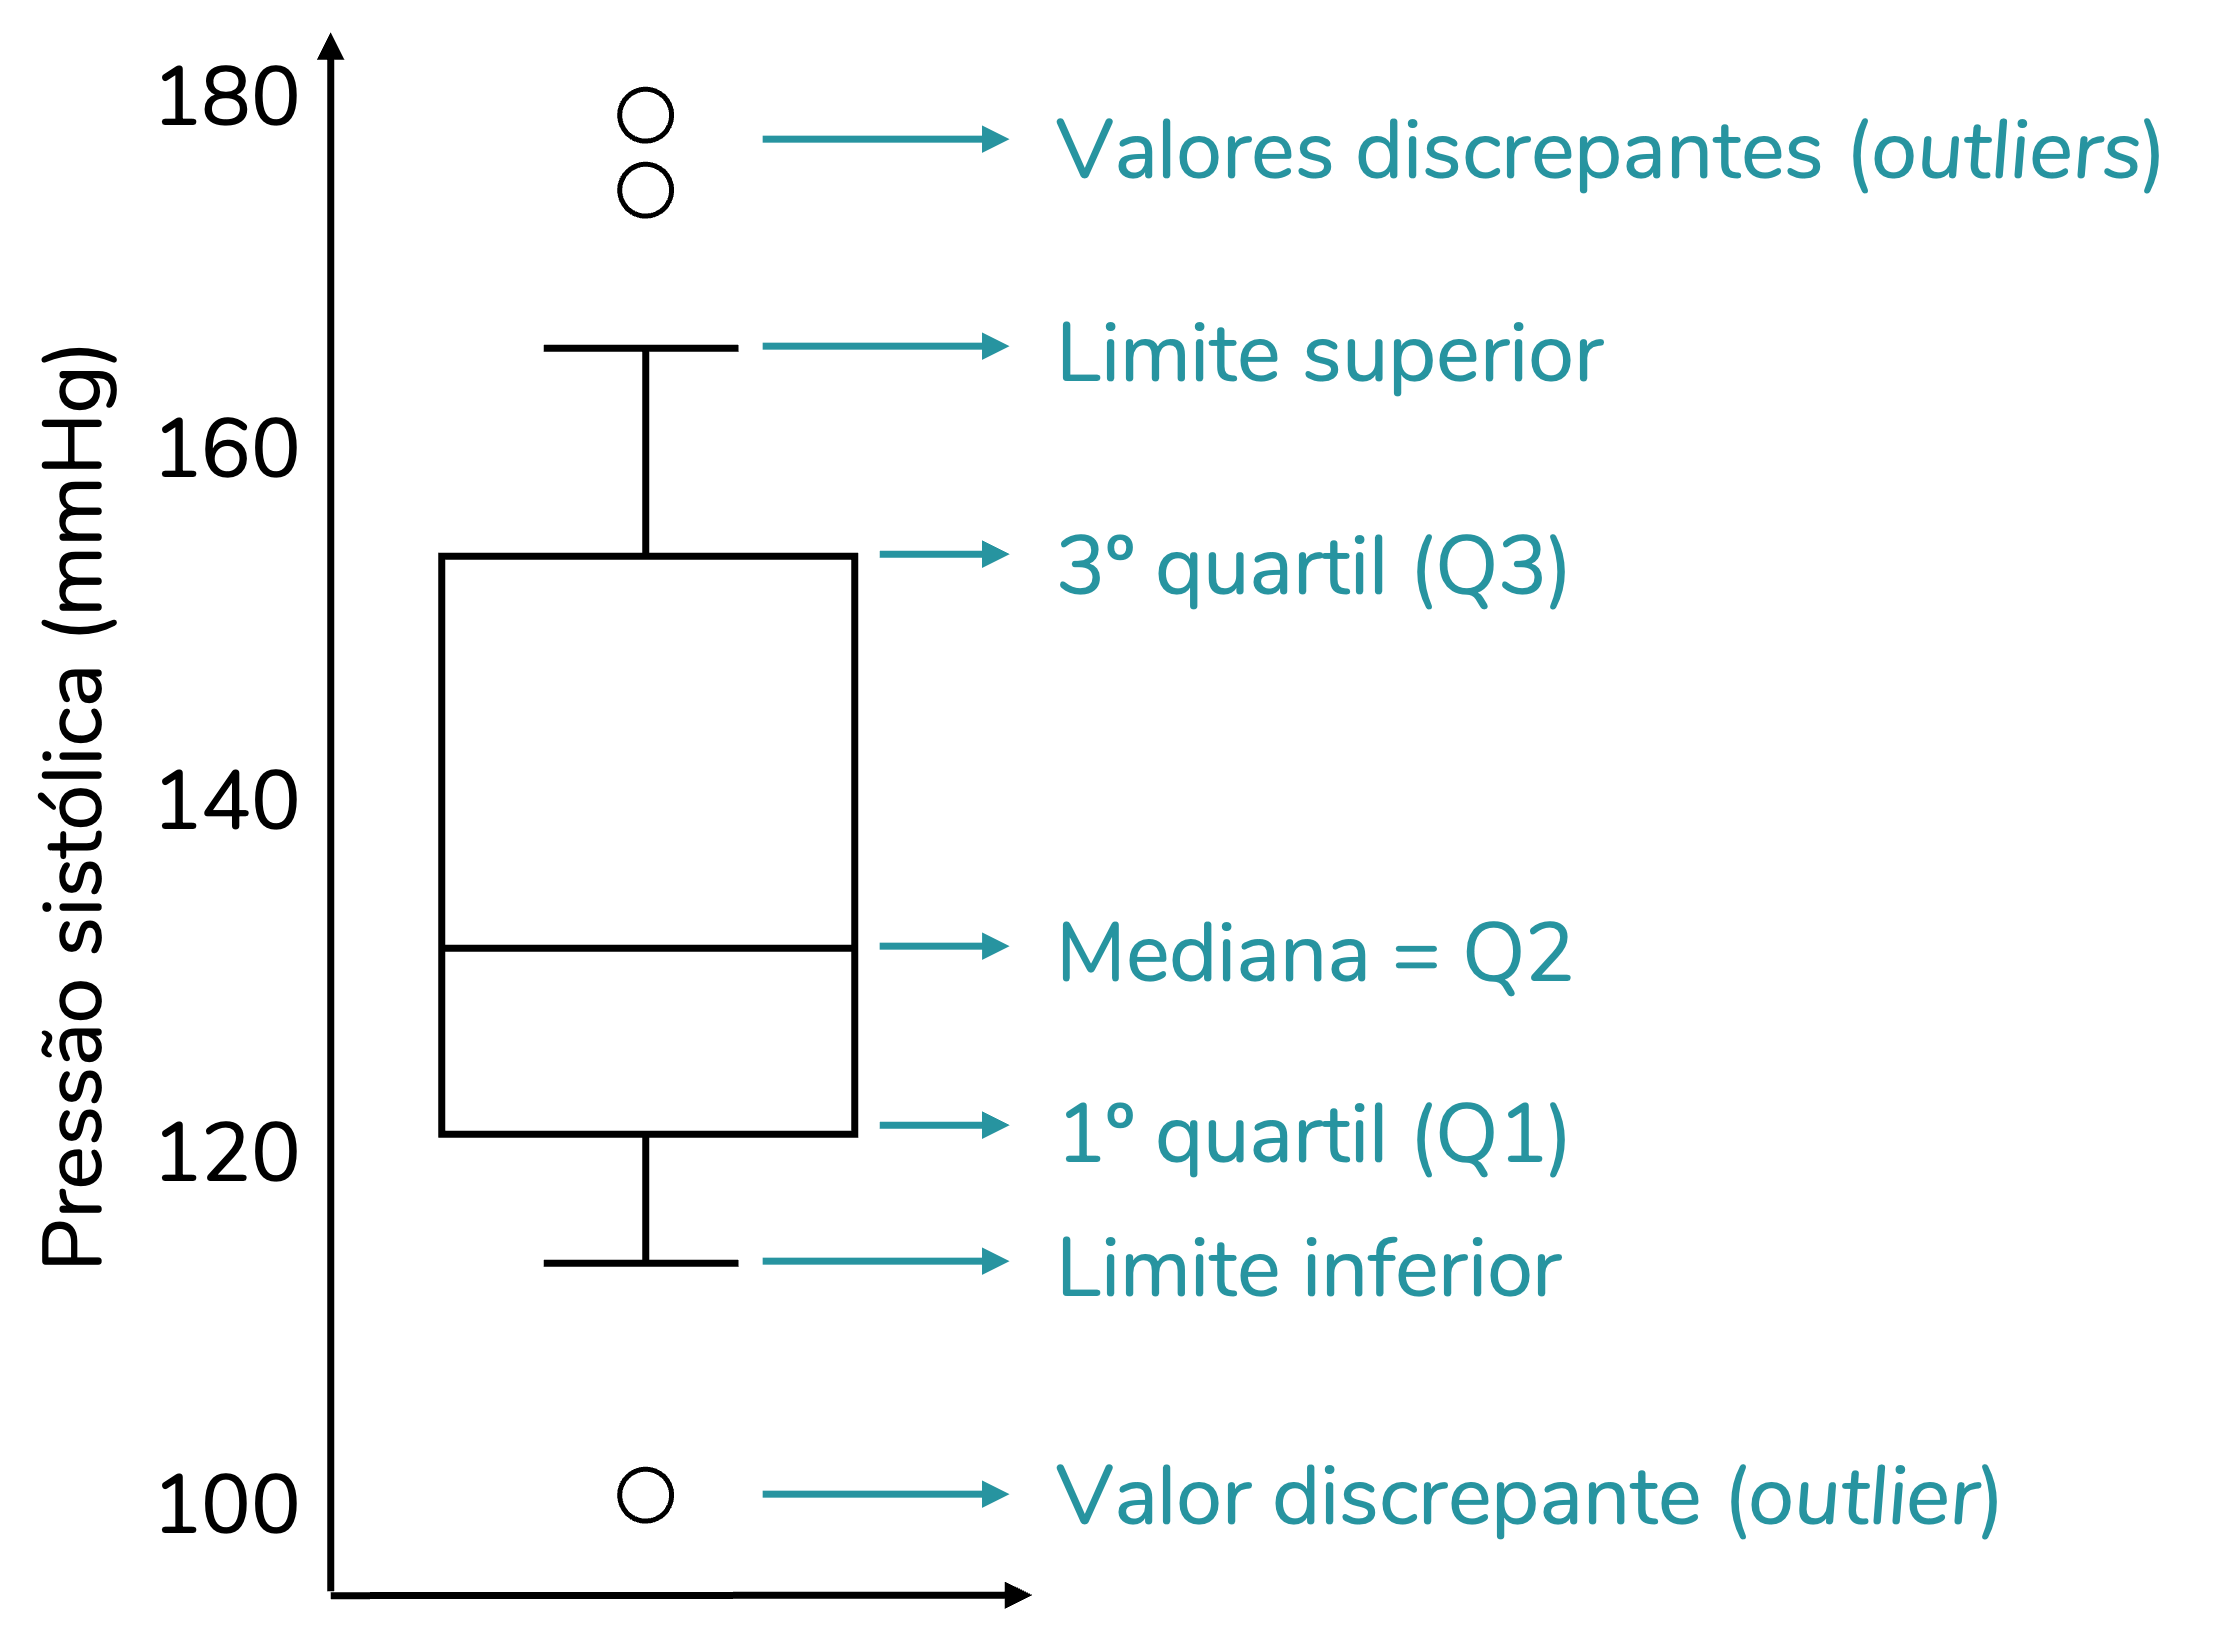

###Boxplot Mean Radius/target

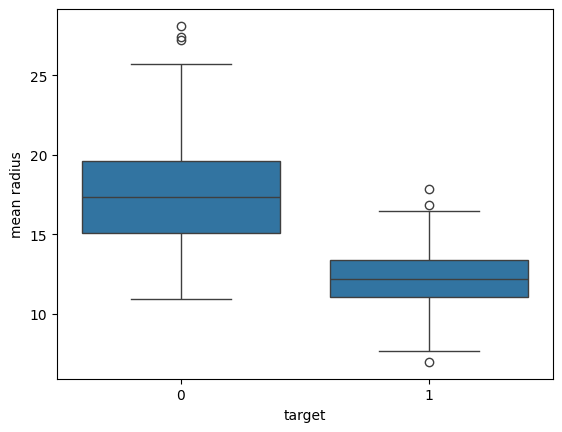

In [6]:
sbn.boxplot(x = "target", y = "mean radius", data = cancer_df)
plt.show()

### 📊 Análise do Boxplot: `mean radius` vs `target`

### 📌 Eixos:

**Eixo X (`target`)**  
- `0`: Tumores **malignos**  
- `1`: Tumores **benignos**

**Eixo Y (`mean radius`)**  
- Média do raio dos núcleos celulares

---

### 🧠 O que o gráfico mostra:

| Target (Classe) | Mediana | Distribuição          | Outliers              |
|-----------------|---------|------------------------|------------------------|
| **Maligno (0)** | ~17.5   | Mais ampla (11 a 26+)  | Vários acima de 25     |
| **Benigno (1)** | ~12.0   | Mais concentrada (7–17)| Alguns acima de 17     |

---

### 📌 Interpretação:

- Tumores **malignos** têm, em média, um **raio maior** do que os benignos.
- A distribuição dos malignos é mais **espalhada**, com maior variabilidade.
- Tumores benignos são mais **consistentes**, com raios menores e menos dispersos.
- A **diferença entre as medianas** indica que `mean radius` pode ser um **bom preditor da classe** (maligno ou benigno).


###Boxplot Mean texture/target

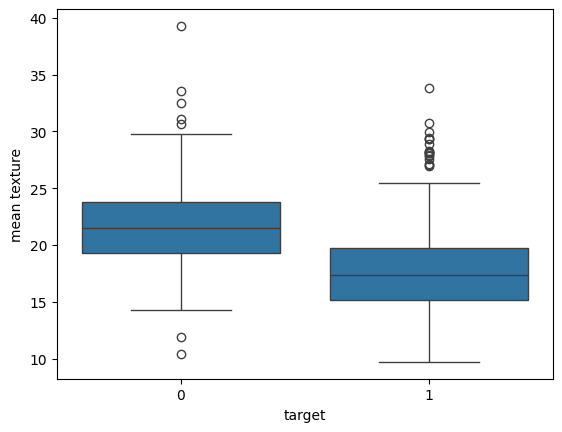

In [7]:
sbn.boxplot(x = "target", y = "mean texture", data = cancer_df)
plt.show()

### 🧠 O que o gráfico mostra:

| Target (Classe) | Mediana | Distribuição            | Outliers                |
|-----------------|---------|--------------------------|--------------------------|
| **Maligno (0)** | ~21.5   | Varia entre ~12 a ~30+   | Alguns acima de 35       |
| **Benigno (1)** | ~18.0   | Varia entre ~10 a ~26    | Muitos acima de 27       |

---

### 📌 Interpretação:

- Tumores **malignos** tendem a ter uma **textura média mais alta** que os benignos.
- A **distribuição dos benignos é mais concentrada** entre 15 e 20, com menos variabilidade.
- Há **mais outliers nos benignos**, mas os malignos têm maior mediana e faixa interquartil mais elevada.
- Assim como `mean radius`, a feature `mean texture` também pode ser **útil para distinguir** entre tumores malignos e benignos, embora com **sobreposição maior** entre as classes.


### Correlação entre features

Note que tendo o raio, encontramos o perímetro e a área. Assim, não precisamos de 3 informações que falam a mesma coisa... Para analisar de maneira geral, vamos plotar o mapa de correlações.

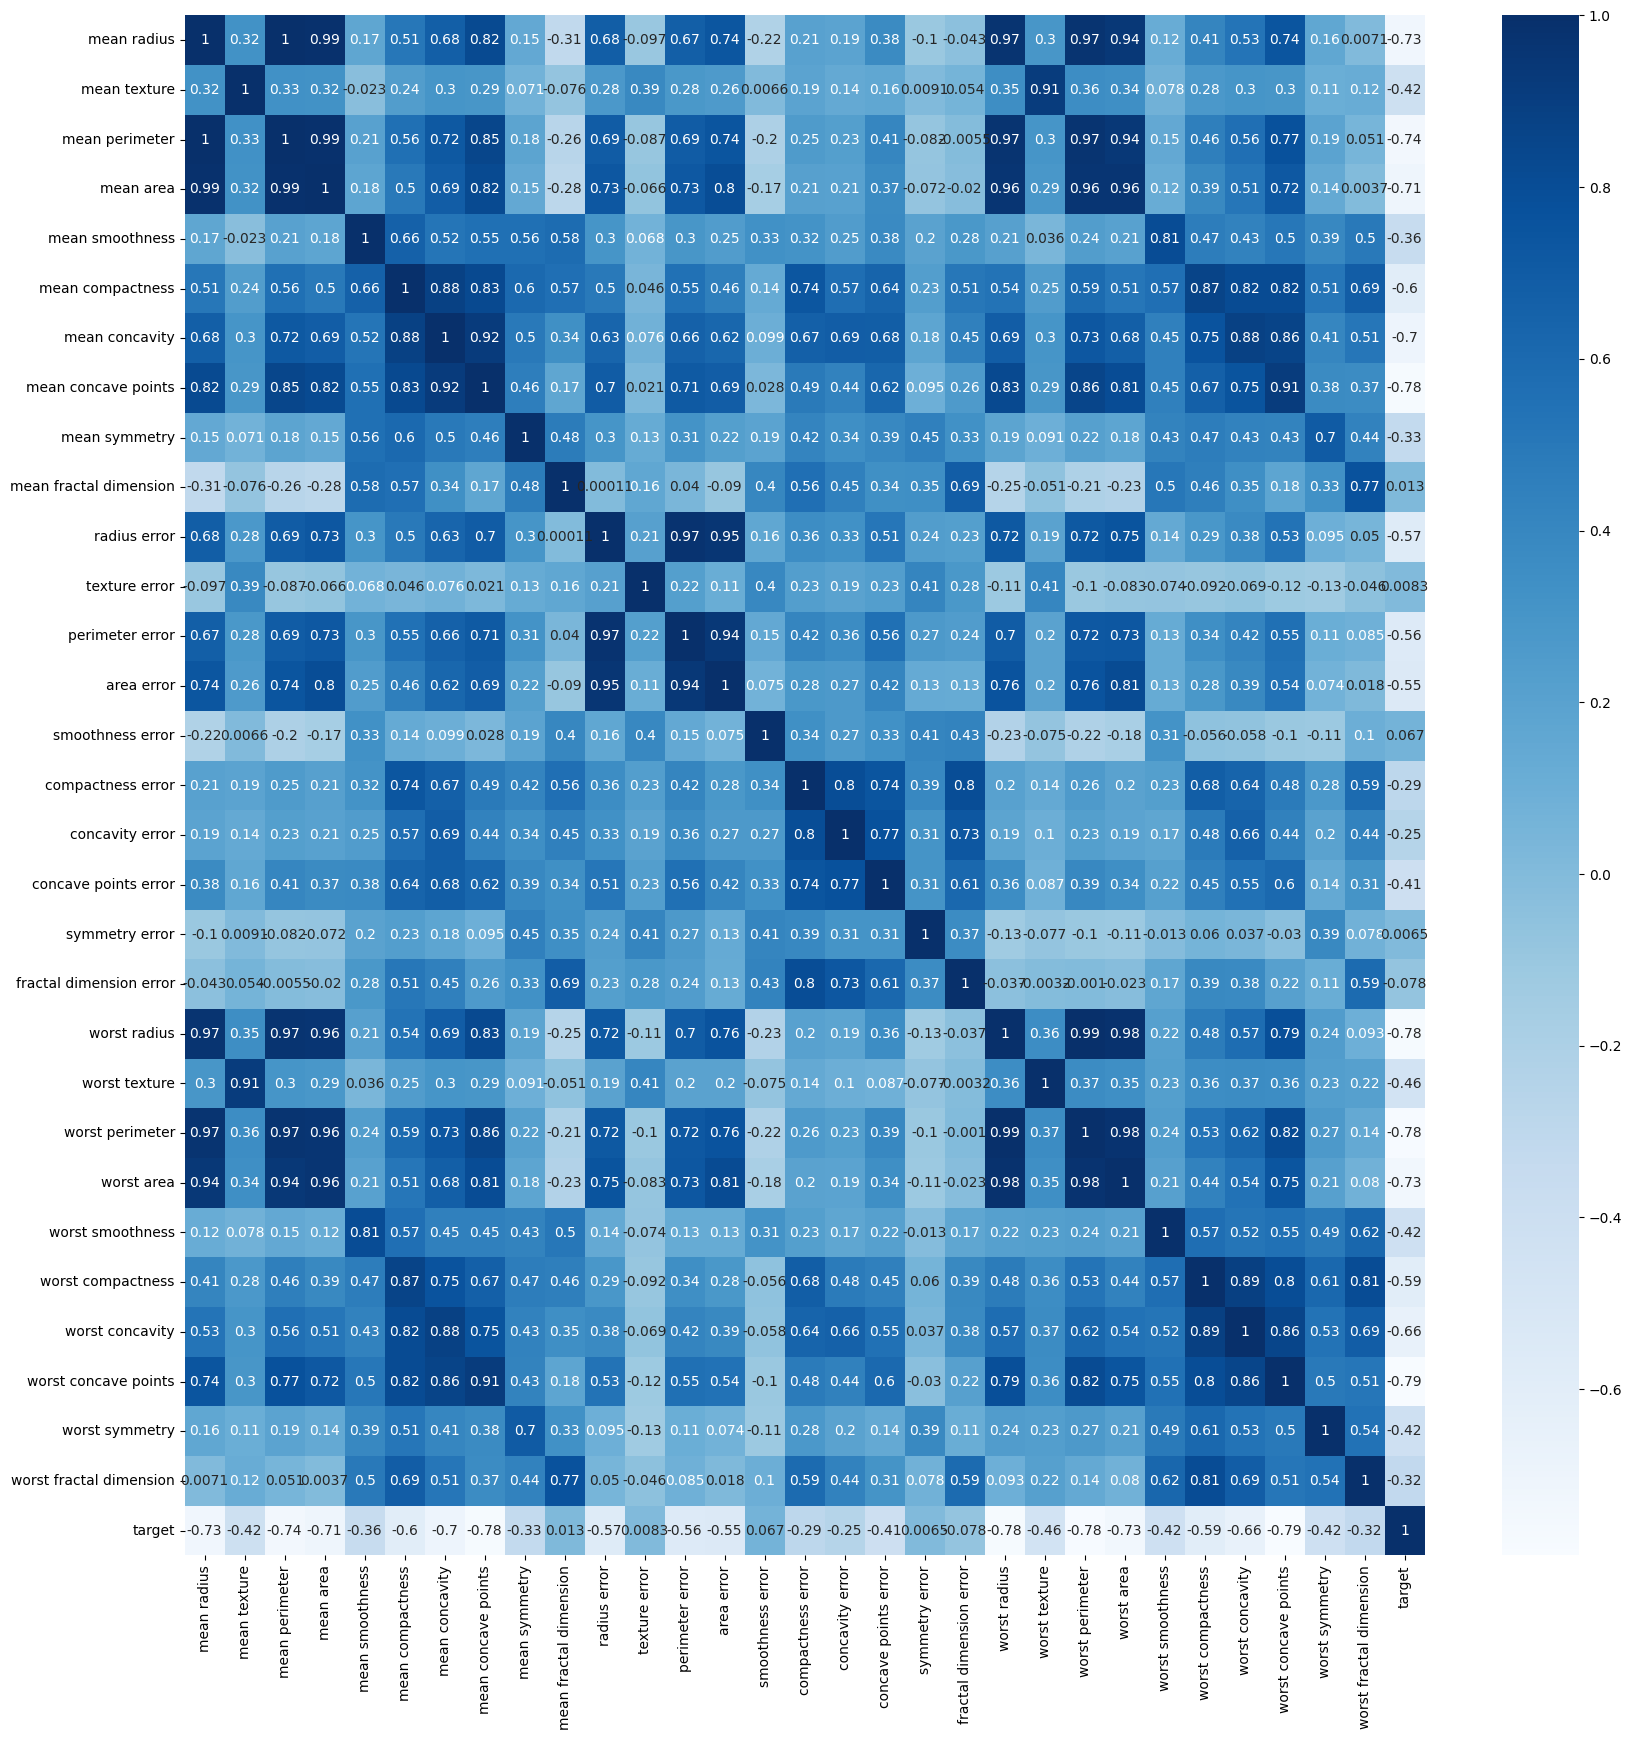

In [8]:
plt.figure(figsize = (20, 20))
sbn.heatmap(cancer_df.corr(), annot = True, cmap = "Blues")
plt.show()

### Feature selection (manual)

In [9]:
cor_target = cancer_df.corr()['target'].abs().sort_values(ascending=False)

# Seleciona as top 10 features mais correlacionadas
top_features = cor_target[1:10].index  # Ignora o 'target' em si
print("Features mais importantes:\n", top_features)

Features mais importantes:
 Index(['worst concave points', 'worst perimeter', 'mean concave points',
       'worst radius', 'mean perimeter', 'worst area', 'mean radius',
       'mean area', 'mean concavity'],
      dtype='object')


In [10]:
cancer_df_reduzido = cancer_df[["worst concave points", "worst perimeter", "mean concave points", "mean radius", "mean concavity", "target"]]

### 📊 Features Selecionadas

| Feature               | Tipo de Informação                         |
|-----------------------|---------------------------------------------|
| `worst concave points`| Irregularidade da borda (pior caso)        |
| `worst perimeter`     | Perímetro do tumor (pior caso)             |
| `mean concave points` | Irregularidade da borda (média)            |
| `mean radius`         | Tamanho (média dos raios)                  |
| `mean concavity`      | Grau de concavidade das bordas (média)     |

---

### 🧠 Comentários Técnicos:

- `concave points` e `concavity` são **altamente correlacionados**, mas também **muito preditivos**.
- `mean radius` e `worst perimeter` também têm **alta correlação**, mas cobrem **aspectos complementares** do tumor (forma e tamanho).
- Essas 5 features representam **forma + tamanho + irregularidade** — um **ótimo combo** para modelos preditivos. 💪


##Análise e visualização de dados

### Regressão linear para mean radius & mean concavity

In [11]:
regressao_linear_mean_radius_mean_concavity = LinearRegression()
#fit
regressao_linear_mean_radius_mean_concavity.fit(cancer_df[["mean radius"]], cancer_df[["mean concavity"]])

LinearRegression()

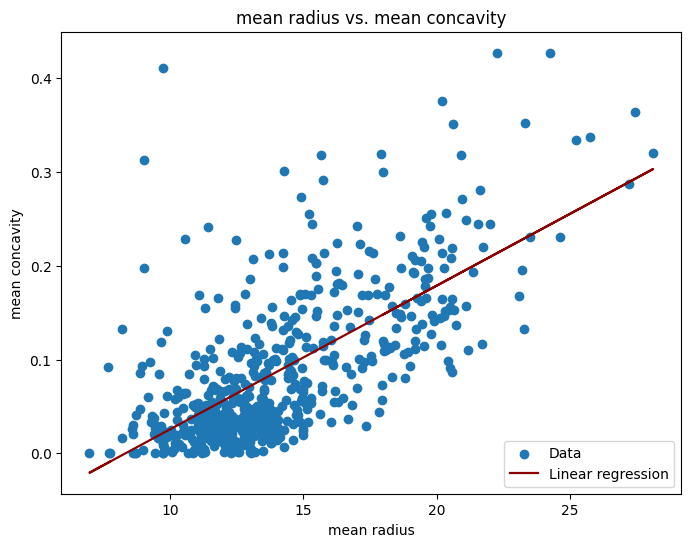

In [12]:
#Gráfico mean radius & mean concavity
plt.figure(figsize=(8, 6))
plt.scatter(cancer_df["mean radius"], cancer_df["mean concavity"])
plt.plot(cancer_df["mean radius"], cancer_df["mean radius"]*regressao_linear_mean_radius_mean_concavity.coef_[0][0] + regressao_linear_mean_radius_mean_concavity.intercept_[0],
         color = "darkred", linewidth = 1.6)
plt.xlabel('mean radius')
plt.ylabel('mean concavity')
plt.title('mean radius vs. mean concavity')
plt.legend(['Data', 'Linear regression'])
plt.show()

### Regressão linear para mean radius & worst concave points

In [13]:
regressao_linear_mean_radius_worst_concave_points = LinearRegression()
#fit
regressao_linear_mean_radius_worst_concave_points.fit(cancer_df[["mean radius"]], cancer_df[["worst concave points"]])

LinearRegression()

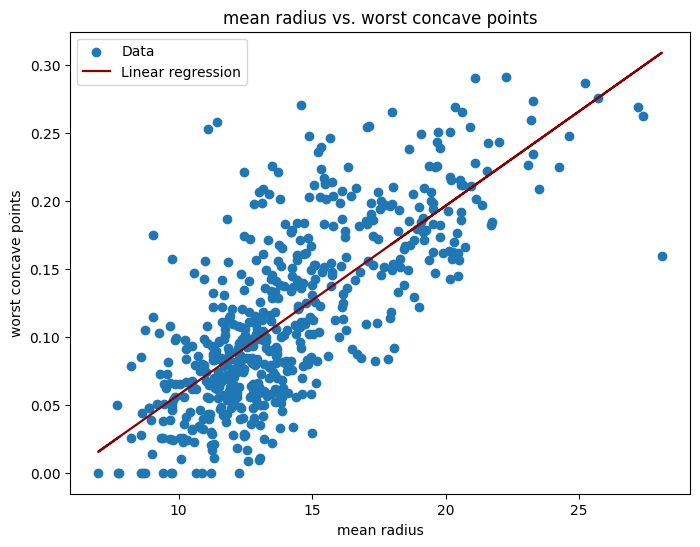

In [14]:
#Gráfico
plt.figure(figsize=(8, 6))
plt.scatter(cancer_df["mean radius"], cancer_df["worst concave points"])
#Linear regression
plt.plot(cancer_df["mean radius"], cancer_df["mean radius"]*regressao_linear_mean_radius_worst_concave_points.coef_[0][0] + regressao_linear_mean_radius_worst_concave_points.intercept_[0],
         color = "darkred", linewidth = 1.6)
plt.xlabel('mean radius')
plt.ylabel('worst concave points')
plt.title('mean radius vs. worst concave points')
plt.legend(['Data', 'Linear regression'])
plt.show()

###Pairplot

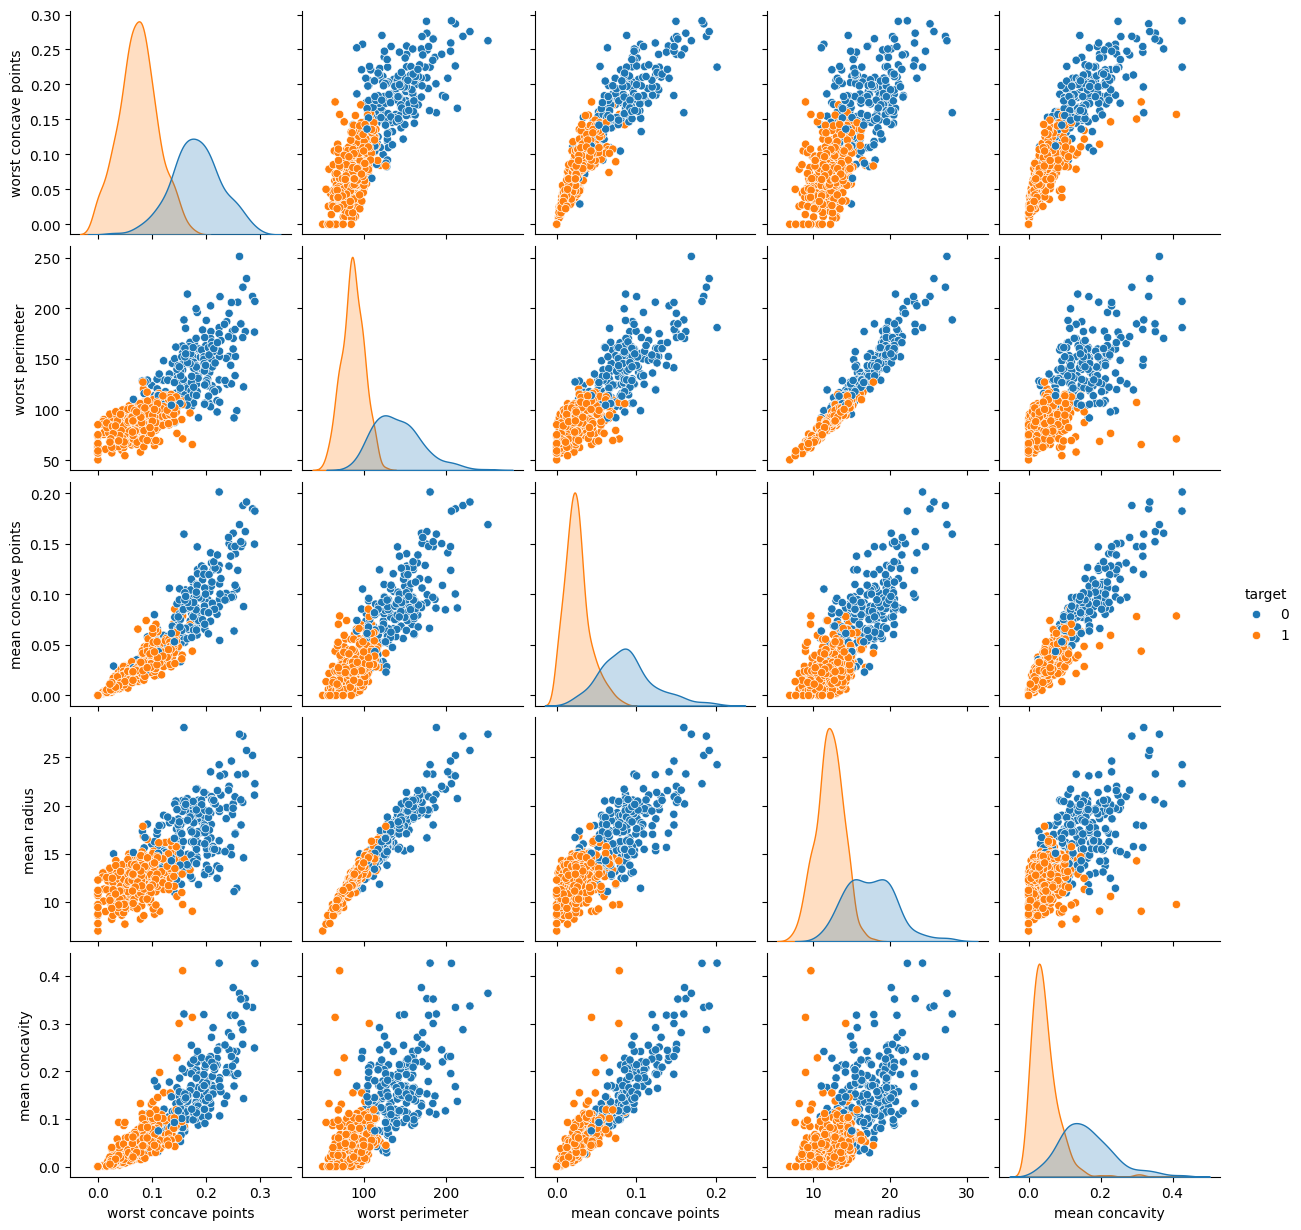

In [15]:
sbn.pairplot(cancer_df_reduzido, hue = "target")
plt.show()

### Scatterplot(worst perimeter vs. worst concave points)

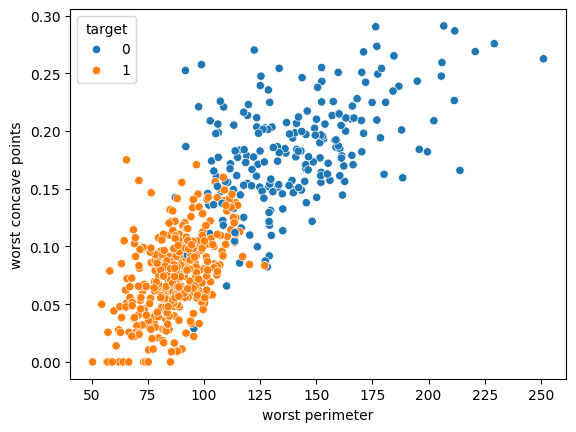

In [16]:
sbn.scatterplot(data = cancer_df_reduzido, x = "worst perimeter", y = "worst concave points", hue = "target")
plt.show()

#### 📈 Gráfico: `worst perimeter` vs `worst concave points` (colorido por `target`)

Este gráfico de dispersão mostra a relação entre:

- **Eixo X:** `worst perimeter` — o maior perímetro observado em cada tumor.
- **Eixo Y:** `worst concave points` — a maior presença de concavidades nas bordas.

As cores representam a variável **target**:
- Azul (**0**) = tumores **malignos**
- Laranja (**1**) = tumores **benignos**

---

#### 🧠 Observações:
- Existe uma **correlação positiva forte** entre `worst perimeter` e `worst concave points`.
- Tumores **malignos** tendem a ter **perímetros maiores** e **bordas mais irregulares** (maior `worst concave points`).
- Tumores **benignos** ficam mais concentrados na parte inferior esquerda do gráfico, indicando **formas menores e mais suaves**.

Essa separação visível sugere que essas duas features são **excelentes candidatas** para classificar o tipo de tumor.


### 3d scatter plot

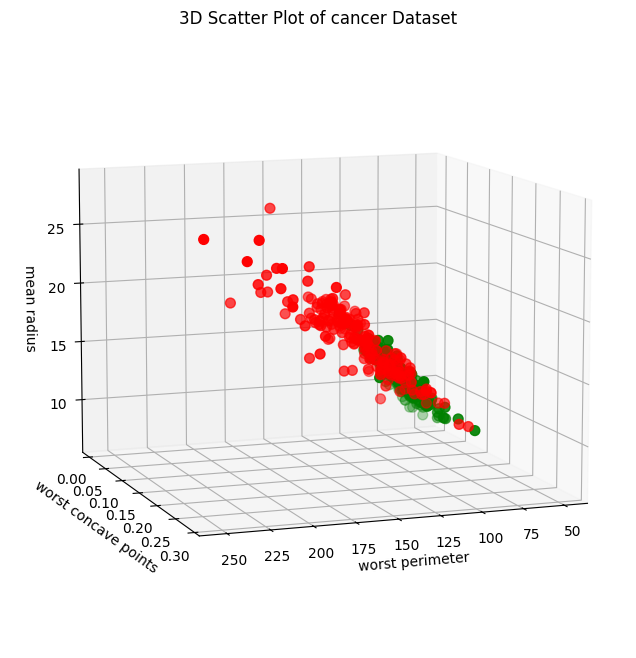

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = cancer_df_reduzido['target'] == target
    ax.scatter(cancer_df_reduzido.loc[indicesToKeep, 'worst perimeter'],
               cancer_df_reduzido.loc[indicesToKeep, 'worst concave points'],
               cancer_df_reduzido.loc[indicesToKeep, 'mean radius'],
               c=color, s=50)

ax.set_xlabel('worst perimeter')
ax.set_ylabel('worst concave points')
ax.set_zlabel('mean radius')
ax.set_title('3D Scatter Plot of cancer Dataset')
ax.view_init(elev=10, azim=70)
plt.show()

### Andrews curves

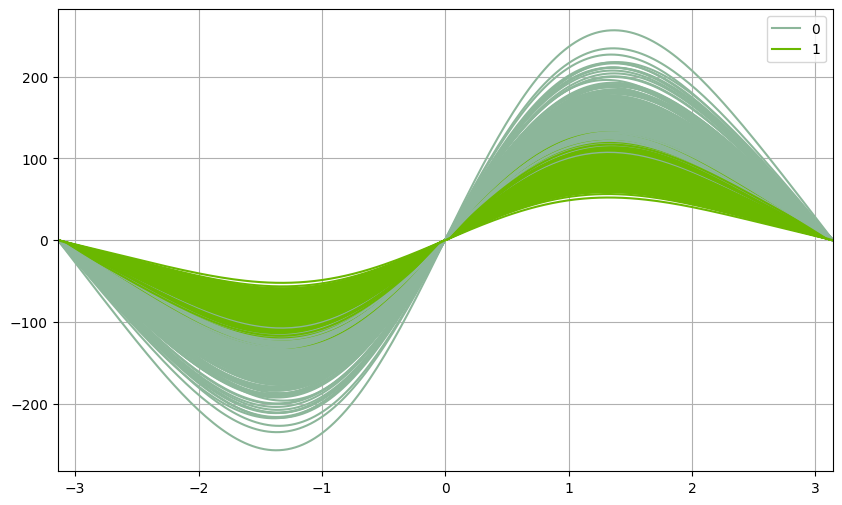

In [18]:
plt.figure(figsize=(10,6))
andrews_curves(cancer_df_reduzido, 'target')
plt.show()

### 🧠 Interpretação visual

#### 📌 O que o gráfico mostra:
- O eixo **X** representa uma dimensão comum (valores padronizados ou transformados).
- O eixo **Y** mostra valores resultantes de alguma transformação (como projeção PCA, função ou base polinomial).
- Cada **linha representa uma amostra**.
- As **cores indicam as classes**:
  - Cinza claro (**0**) = tumores malignos
  - Verde (**1**) = tumores benignos

#### 🔍 Observações:
- As **curvas verdes (benignos)** estão bem agrupadas, com amplitude e variação bem menor.
- As **curvas cinzas (malignos)** são muito mais dispersas, indicando maior variabilidade.
- Ambos os grupos parecem simétricos em torno da origem do eixo X (sinal de padronização ou função centrada).
- A separação visual entre os grupos é forte.

#### ✅ Conclusão:
Esse gráfico sugere que há uma **separabilidade estrutural clara entre benignos e malignos** com base nessas curvas.

Modelos como **KNN, SVM ou Regressão Logística** tendem a se sair bem, pois essa representação favorece classificadores lineares ou baseados em distância.

##Machine Learning

### Data split

In [19]:
x = cancer_df_reduzido.drop("target", axis = 1)
y = cancer_df_reduzido["target"]
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 42)

### 📌 Explicações dos Algoritmos de Machine Learning

---

#### 🔹 Logistic Regression

A Regressão Logística é um modelo estatístico usado para **classificação binária**. Apesar do nome, ela é usada para prever a **probabilidade de classes**, e não valores contínuos.

- **Vantagens**:
  - Simples e eficiente
  - Fácil de interpretar
  - Funciona bem quando há uma relação linear entre as features e o log da odds

- **Desvantagens**:
  - Não captura relações não-lineares bem
  - Pode ter performance limitada em problemas complexos

---

#### 🔹 Random Forest Classifier

O Random Forest é um algoritmo de ensemble que cria **múltiplas árvores de decisão** e retorna a classe que é a mais votada entre elas.

- **Vantagens**:
  - Robusto a overfitting
  - Lida bem com dados com muitas features
  - Funciona bem sem necessidade de normalização

- **Desvantagens**:
  - Mais difícil de interpretar
  - Pode ser mais lento em datasets grandes

---

#### 🔹 K-Nearest Neighbors (KNN)

O KNN classifica uma nova amostra com base nas **K amostras mais próximas** (vizinhas) no espaço de características.

- **Vantagens**:
  - Simples e intuitivo
  - Não assume distribuição dos dados

- **Desvantagens**:
  - Sensível à escala (precisa de normalização)
  - Lento com grandes quantidades de dados
  - Performance pode ser afetada por dados ruidosos

### Regressão logística

In [20]:
#Criação do modelo inicial
regressao_logistica = LogisticRegression()

In [21]:
# Fine tuning
penalty = ["l1", "l2", "elasticnet"]
C = np.array([0.0007, 0.001, 0.005, 0.009, 0.01])
grid_regressao_logistica = GridSearchCV(estimator = regressao_logistica, param_grid = dict(penalty = penalty, C = C), cv = 5, n_jobs = -1)
grid_regressao_logistica.fit(x_treino, y_treino)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.0007, 0.001 , 0.005 , 0.009 , 0.01  ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [22]:
#Criação do modelo "tunado"
regressao_logistica = LogisticRegression(C = grid_regressao_logistica.best_estimator_.C, penalty = grid_regressao_logistica.best_estimator_.penalty)
#Treinamento
regressao_logistica.fit(x_treino, y_treino)

LogisticRegression(C=np.float64(0.0007))

In [23]:
#Predição
y_pred_regressao_logistica = regressao_logistica.predict(x_teste)

In [24]:
#Resultado - Acurácia
print(f"Acurácia: {accuracy_score(y_teste, y_pred_regressao_logistica)}")

Acurácia: 0.956140350877193


In [25]:
#Report geral
print(classification_report(y_teste, y_pred_regressao_logistica))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



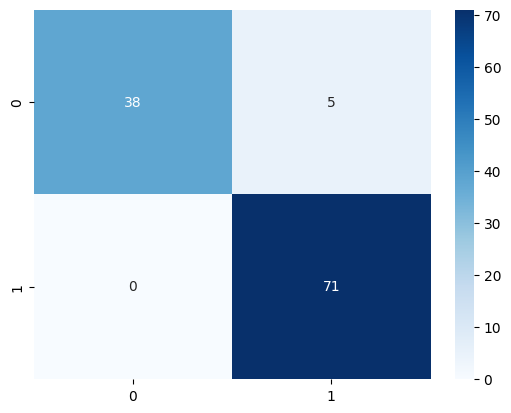

In [26]:
#Matriz de confusão
Matriz_de_confusao_regressao_logisitca = confusion_matrix(y_teste, y_pred_regressao_logistica)
sbn.heatmap(Matriz_de_confusao_regressao_logisitca, annot = True, cmap = "Blues")
plt.show()

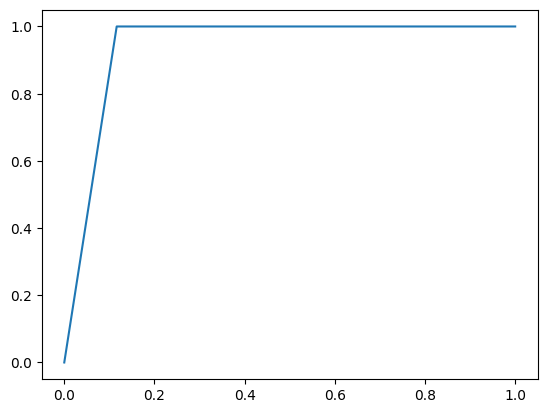

In [27]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_teste, y_pred_regressao_logistica)
plt.plot(fpr, tpr, label = "Regressão Logística")

In [28]:
#roc_auc_score
print(f"ROC AUC Score: {roc_auc_score(y_teste, y_pred_regressao_logistica)}")

ROC AUC Score: 0.9418604651162791


Essa imagem mostra uma curva ROC quase perfeita — o gráfico sobe quase verticalmente até o topo (TPR = 1) com FPR muito baixo, e depois segue horizontal até o final. Isso indica que o modelo:

✅ Tem excelente desempenho
✅ Distingue muito bem entre as classes
✅ AUC próxima de 1.0

### Acurácia da regressão logística: 96%

### Random Forest Classifier

In [29]:
#Criação do modelo inicial
RF = RandomForestClassifier()

In [30]:
#Fine tuning
max_depth = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
min_samples_split = np.array([2, 3, 4, 5, 6, 7, 8, 9])
param_grid = dict(max_depth = max_depth, min_samples_split = min_samples_split)
grid_RF = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 5, n_jobs = -1)
grid_RF.fit(x_treino, y_treino)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [31]:
#Criação do modelo "tunado"
RF = RandomForestClassifier(max_depth = grid_RF.best_estimator_.max_depth, min_samples_split = grid_RF.best_estimator_.min_samples_split)
#Treinamento
RF.fit(x_treino, y_treino)

RandomForestClassifier(max_depth=np.int64(4), min_samples_split=np.int64(5))

In [32]:
#predição
y_pred_RF = RF.predict(x_teste)

In [33]:
#Resultados
print(classification_report(y_teste, y_pred_RF))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



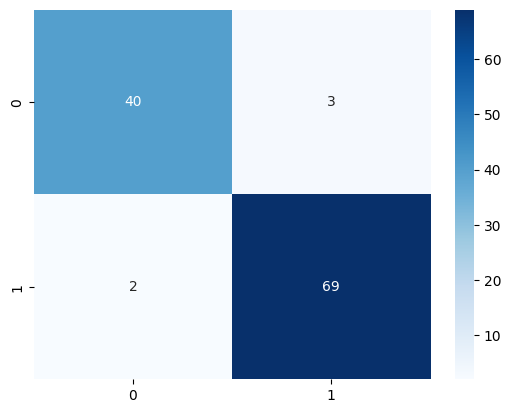

In [34]:
#Matriz de confusão
Matriz_RF = confusion_matrix(y_teste, y_pred_RF)
sbn.heatmap(Matriz_RF, annot = True, cmap = "Blues")
plt.show()

### Acurácia do Random Forest Classifier: 95%

### KNN

Para usar este algoritmo, precisamos normalizar os dados das features...

In [35]:
Normalizacao = MinMaxScaler(feature_range = (0, 1))
x_KNN = cancer_df_reduzido.drop(["target"], axis = 1)
x_KNN = Normalizacao.fit_transform(x_KNN)
y_KNN = cancer_df["target"]

In [36]:
#Data split KNN
x_teste_KNN, x_treino_KNN, y_teste_KNN, y_treino_KNN = train_test_split(x_KNN, y_KNN, test_size = 0.2, random_state = 42)

In [37]:
#Modelo bruto
KNN = KNeighborsClassifier()

In [38]:
#Fine tuning
K_Values = np.array([5, 6, 7, 8, 9, 10, 11])
metric = ["minkowski", "chebyshev"]
p = np.array([1, 2, 3, 4, 5])
param_grid_KNN = dict(n_neighbors = K_Values, metric = metric, p = p)
grid_KNN = GridSearchCV(estimator = KNN, param_grid = param_grid_KNN, cv = 5, n_jobs = -1)
grid_KNN.fit(x_treino_KNN, y_treino_KNN)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11]),
                         'p': array([1, 2, 3, 4, 5])})

In [39]:
#Modelo "tunado"
KNN = KNeighborsClassifier(metric = grid_KNN.best_estimator_.metric, n_neighbors = grid_KNN.best_estimator_.n_neighbors, p = grid_KNN.best_estimator_.p)
#Treinamento
KNN.fit(x_treino_KNN, y_treino_KNN)

KNeighborsClassifier(n_neighbors=np.int64(10), p=np.int64(5))

In [40]:
#Predição
y_pred_KNN = KNN.predict(x_teste_KNN)

In [41]:
#Resultado - Acurácia
print(accuracy_score(y_teste_KNN, y_pred_KNN))

0.9274725274725275


In [42]:
print(classification_report(y_teste_KNN, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       169
           1       0.94      0.94      0.94       286

    accuracy                           0.93       455
   macro avg       0.92      0.92      0.92       455
weighted avg       0.93      0.93      0.93       455



### Acurácia do KNN: 95%

##Validação e testes

In [43]:
x_20 = [
    [13.54, 0.04781, 0.06664, 99.70, 0.1288],
    [13.08, 0.03110, 0.04568, 96.09, 0.07283],
    [9.504, 0.02076, 0.02956, 65.13, 0.06227],
    [13.03, 0.02923, 0.02562, 84.46, 0.05013],
    [8.196, 0.005917, 0.01588, 57.26, 0.02564],
    [12.05, 0.02749, 0.06592, 89.88, 0.06548],
    [13.49, 0.03384, 0.04751, 99.00, 0.1282],
    [11.76, 0.01115, 0.01657, 82.98, 0.03715],
    [13.64, 0.01723, 0.01857, 96.08, 0.08586],
    [11.94, 0.01349, 0.01972, 83.67, 0.06296],
    [17.99, 0.1471, 0.3001, 184.60, 0.2654],
    [20.57, 0.07017, 0.08690, 158.80, 0.1860],
    [19.69, 0.1279, 0.1974, 152.50, 0.2430],
    [11.42, 0.1052, 0.2414, 98.87, 0.2575],
    [20.29, 0.1043, 0.1980, 152.20, 0.1625],
    [12.45, 0.08089, 0.1578, 103.40, 0.1741],
    [18.25, 0.07400, 0.1127, 153.20, 0.1932],
    [13.71, 0.05985, 0.09366, 110.60, 0.1556],
    [13.00, 0.09353, 0.1859, 106.20, 0.2060],
    [12.46, 0.08543, 0.2273, 97.65, 0.2210]
]

y_20 = [
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  # benignos
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0   # malignos
]

In [44]:
y_pred_novo = regressao_logistica.predict(x_20)
print(accuracy_score(y_20, y_pred_novo))

0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


50% apenas! Enfretamos um caso de overfiting. Vamos testar se isso ocorre nos outros modelos...

In [45]:
y_pred_novo_rf = RF.predict(x_20)
print(accuracy_score(y_20, y_pred_novo_rf))

0.9


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Opa! Bem melhor! Ou seja, nem tudo é o que parece...

In [46]:
y_pred_novo_KNN = KNN.predict(x_20)
print(accuracy_score(y_20, y_pred_novo_KNN))

0.5
